First call
dt-start
 statev0 is updated
    1   0.269E-02   0.384E-10   0.384E-10   0.207E+02   0.000E+00   0.000E+00   0.000E+00   0.000E+00
dt-end
dt-start
 statev0 is updated
    2   0.538E-02  -0.230E-10  -0.230E-10   0.415E+02   0.000E+00   0.000E+00   0.000E+00   0.000E+00
dt-end
dt-start
 statev0 is updated
    3   0.808E-02  -0.311E-14  -0.311E-14   0.622E+02   0.000E+00   0.000E+00   0.000E+00   0.000E+00
dt-end
dt-start
 statev0 is updated
    4   0.108E-01  -0.355E-14  -0.400E-14   0.830E+02   0.000E+00   0.000E+00   0.000E+00   0.000E+00
dt-end
dt-start
 statev0 is updated
    5   0.135E-01  -0.307E-10  -0.307E-10   0.104E+03   0.000E+00   0.000E+00   0.000E+00   0.000E+00
dt-end
dt-start
 statev0 is updated
    6   0.162E-01   0.767E-11   0.767E-11   0.124E+03   0.000E+00   0.000E+00   0.000E+00   0.000E+00
dt-end
dt-start
 statev0 is updated
    7   0.188E-01   0.153E-10   0.153E-10   0.145E+03   0.000E+00   0.000E+00   0.000E+00   0.000E+00
dt-end
dt-start
 statev0 is up

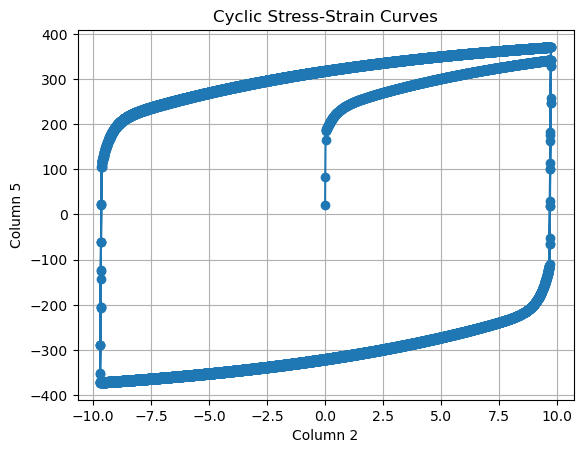

In [1]:
import os
import subprocess
import sys
import numpy as np
import matplotlib.pyplot as plt

def install_packages():
    try:
        import numpy
        import matplotlib
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy", "matplotlib"])

def compile_fortran():
    try:
        subprocess.run(["gfortran", "cycDeformationModelling.f", "-o", "aaa"], check=True)
    except subprocess.CalledProcessError:
        print("Error compiling Fortran code")
        sys.exit(1)

def run_fortran_executable():
    try:
        subprocess.run(["./aaa"], check=True)
    except subprocess.CalledProcessError:
        print("Error running Fortran executable")
        sys.exit(1)

def plot_data():
    try:
        data = np.loadtxt('se3.dat')
        x = data[:, 1]
        y = data[:, 4]

        plt.plot(x, y, marker='o')
        plt.xlabel('Column 2')
        plt.ylabel('Column 5')
        plt.title('Cyclic Stress-Strain Curves')
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error plotting data: {e}")
        sys.exit(1)

def main():
    install_packages()
    compile_fortran()
    run_fortran_executable()
    plot_data()

if __name__ == "__main__":
    main()
